<a href="https://colab.research.google.com/github/starvar7169/leadbasic/blob/main/langdetc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('Language Detection.csv')
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [6]:
print(data['Language'].unique())
print(data['Language'].value_counts())

['English' 'Malayalam' 'Hindi' 'Tamil' 'Portugeese' 'French' 'Dutch'
 'Spanish' 'Greek' 'Russian' 'Danish' 'Italian' 'Turkish' 'Sweedish'
 'Arabic' 'German' 'Kannada']
Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64


In [11]:
x=data['Text']
y=data['Language']
le=LabelEncoder()
y=le.fit_transform(y)
data_list=[]
for text in x:
  text=re.sub(r'[0-9:/\;@!#$%^&*]', ' ', text)
  text=re.sub(r'[[]]', ' ', text)
  text=text.lower()
  data_list.append(text)

In [13]:
cv= CountVectorizer()
x=cv.fit_transform(data_list).toarray()
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.20)
model=MultinomialNB()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

Accuracy: 0.9738878143133463
Precision: 0.9761053571814184
Recall: 0.9738878143133463


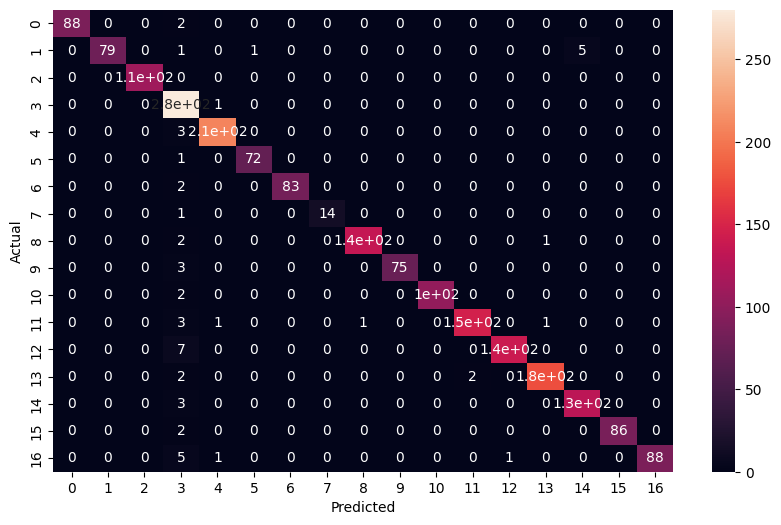

In [16]:
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred, average='weighted')
recall=recall_score(y_test, y_pred, average='weighted')
cm=confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
def predict(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print("The langauge is in",lang[0])
text = input("Enter text in any language: ")
predicted_language = predict(text)
print("The language is:", predicted_language)

Enter text in any language: im a girl
The langauge is in German
The language is: None
